# Python Implementation of Tree Methods 


In [74]:
#########################
#  Libraries Requiered
#########################

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import sklearn 
import seaborn as sns
from datetime import datetime

### The three forest algorithms

They belong to sklearn

In [15]:

####################################
#### The three forest algorithms
#####################################

from sklearn.ensemble import(
    BaggingRegressor,RandomForestRegressor, AdaBoostRegressor
)

Now we import the Mean Squared Error (MSE) $$\text{MSE} = \frac{1}{N}\sum_{i=1}^{N} (y_{i}-\hat{y}_{i}^2)  $$

In [23]:
from sklearn.metrics import mean_squared_error

###### Model Selection


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor

## Reading the Data 

In [16]:
tsla = pd.read_csv('TSLA.csv')

In [25]:
## A first glance at the Data Collected from:
##        Kaggle https://www.kaggle.com/timoboz/tesla-stock-data-from-2010-to-2020
## 

tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


### Building our Training Set
We need to build a training set. For this purpose we collect the data of $l$ consecutive days.

In [36]:
### Attempt
tsla_delayed = pd.DataFrame(index = tsla.index)
tsla_delayed['Today'] = tsla['Adj Close']
tsla_delayed['Volume'] = tsla['Volume']


In [38]:
tsla_delayed.head()

,Today,Volume,Prev_day1,Prev_day2,Prev_day3
0,23.889999,18766300,NaN,NaN,NaN
1,23.830000,17187100,23.889999,NaN,NaN
2,21.959999,8218800,23.830000,23.889999,NaN
3,19.200001,5139800,21.959999,23.830000,23.889999
4,16.110001,6866900,19.200001,21.959999,23.830000


In [37]:
l = 3
for i in range(0,l):
    tsla_delayed["Prev_day%s"% str(i+1)]= tsla['Adj Close'].shift(i+1) 
    

In [39]:
### The return porcentage
tsla_return = pd.DataFrame(index = tsla_delayed.index)
tsla_return['Volume'] = tsla_delayed['Volume']
tsla_return['Today'] = tsla_delayed['Today'].pct_change()*100.0

In [41]:
tsla_return.head(10)

,Volume,Today
0,18766300,NaN
1,17187100,-0.251147
2,8218800,-7.847256
3,5139800,-12.568297
4,6866900,-16.093749
5,6921700,-1.924277
6,7711400,10.506323
7,4050600,-0.343637
8,2202500,-2.011500
9,2680100,6.392962


In [53]:
## Delayed Porcentage

for i in range(0,l):
    tsla_return["Prev_day%s"% str(i+1)] = tsla_delayed["Prev_day%s"% str(i+1)].pct_change()*100.0
start = 5
tsla_return = tsla_return[tsla_return.index >= start ]


In [55]:
tsla_return.head(10)

,Volume,Today,Prev_day1,Prev_day2,Prev_day3
5,6921700,-1.924277,-16.093749,-12.568297,-7.847256
6,7711400,10.506323,-1.924277,-16.093749,-12.568297
7,4050600,-0.343637,10.506323,-1.924277,-16.093749
8,2202500,-2.011500,-0.343637,10.506323,-1.924277
9,2680100,6.392962,-2.011500,-0.343637,10.506323
10,4195200,9.371561,6.392962,-2.011500,-0.343637
11,3739800,0.252011,9.371561,6.392962,-2.011500
12,2621300,3.770739,0.252011,9.371561,6.392962
13,2486500,6.153106,3.770739,0.252011,9.371561
14,1825300,-7.348247,6.153106,3.770739,0.252011


In [50]:
start = datetime.date(2006,1,1)

In [58]:
tsla_return.Today

5       -1.924277
6       10.506323
7       -0.343637
8       -2.011500
9        6.392962
          ...    
2411     1.591341
2412     2.485441
2413    10.296220
2414     1.523074
2415    19.894860
Name: Today, Length: 2411, dtype: float64

In [90]:
tsla.Date

0       2010-06-29
1       2010-06-30
2       2010-07-01
3       2010-07-02
4       2010-07-06
           ...    
2411    2020-01-28
2412    2020-01-29
2413    2020-01-30
2414    2020-01-31
2415    2020-02-03
Name: Date, Length: 2416, dtype: object

#### Set the starting and ending dates
We shring the table according to the initial and final dates.

In [180]:

dates =  pd.DataFrame(index = tsla.index)
strtodate = lambda x : datetime.strptime(x,'%Y-%m-%d')

dates['Date'] = tsla.Date.map(strtodate)
d1 = datetime(2018, 5, 3)
d2 = datetime(2020, 5, 3)


dates = dates.loc[lambda dates: d2 > dates['Date']   , :]
dates = dates.loc[lambda dates:  dates['Date']> d1   , :]
dates
#dates.applymap(todate)
#dates.Date[5]
##datetime.strptime(dates.Date[5],'%Y-%m-%d')
##tsla.apply(np.sqrt , index=['Volume'])

,Date
1976,2018-05-04
1977,2018-05-07
1978,2018-05-08
1979,2018-05-09
1980,2018-05-10
...,...
2411,2020-01-28
2412,2020-01-29
2413,2020-01-30
2414,2020-01-31


In [103]:
tsla['Date']

0       2010-06-29
1       2010-06-30
2       2010-07-01
3       2010-07-02
4       2010-07-06
           ...    
2411    2020-01-28
2412    2020-01-29
2413    2020-01-30
2414    2020-01-31
2415    2020-02-03
Name: Date, Length: 2416, dtype: object

In [84]:
 pd.to_datetime(tsla.Date[515],
                              format='%Y-%m-%d')

Timestamp('2012-07-13 00:00:00')

In [86]:
d1 = datetime(2018, 5, 3)
d2 = datetime(202, 6, 1)

In [100]:
d1>start

True

## 
Now we are ready to define our function  

In [194]:
def returns_delayed_table (data, start_date, end_date ,delay_number):
    
    data_S = dates =  pd.DataFrame(index = data.index)  
    
    strtodate = lambda x : datetime.strptime(x,'%Y-%m-%d')

    #data_S['Date'] = data.Date.map(strtodate)
    data_S['Adj Close'] = data['Adj Close']
    data_S['Volume'] = data['Volume']

    #data_S = data_S.loc[lambda dates: end_date > data_S['Date']  , :]
    #data_S = data_S.loc[lambda dates:  data_S['Date'] > start_date   , :]
    
    
    
    data_delayed = pd.DataFrame(index = data_S.index)
    data_delayed['Today'] = data_S['Adj Close']
    data_delayed['Volume'] = data_S['Volume']

    
    for i in range(0,delay_number):
        data_delayed["Prev_day%s"% str(i+1)]= data_S['Adj Close'].shift(i+1) 
    
    data_return = pd.DataFrame(index = data_delayed.index)
    data_return['Volume'] = data_delayed['Volume']
    data_return['Today'] = data_delayed['Today'].pct_change()*100.0


    for i in range(0,delay_number):
        data_return["Prev_day%s"% str(i+1)] = data_delayed["Prev_day%s"% str(i+1)].pct_change()*100.0
        
    data_return['Date'] = data.Date.map(strtodate)
    data_return = data_return.loc[lambda dates: end_date > data_return['Date']  , :]
    data_return = data_return.loc[lambda dates:  data_return['Date'] > start_date   , :]
    
    
    
    
    return data_return
    


In [195]:
returns_delayed_table (tsla, datetime(2018, 5, 3), datetime(2020, 5, 3),3)

,Volume,Today,Prev_day1,Prev_day2,Prev_day3,Date
1976,8569400,3.388991,-5.545403,0.410103,2.048322,2018-05-04
1977,8678200,2.951475,3.388991,-5.545403,0.410103,2018-05-07
1978,5930000,-0.264223,2.951475,3.388991,-5.545403,2018-05-08
1979,5727400,1.616056,-0.264223,2.951475,3.388991,2018-05-09
1980,5651600,-0.596388,1.616056,-0.264223,2.951475,2018-05-10
...,...,...,...,...,...,...
2411,11788500,1.591341,-1.203921,-1.289760,0.463518,2020-01-28
2412,17801500,2.485441,1.591341,-1.203921,-1.289760,2020-01-29
2413,29005700,10.296220,2.485441,1.591341,-1.203921,2020-01-30
2414,15719300,1.523074,10.296220,2.485441,1.591341,2020-01-31


In [232]:
random_state = 42
n_jobs = 1 
n_estimators = 1000
step_factor = 10
axis_step = int (n_estimators/step_factor)

In [238]:
### Set initial date and End date
start = datetime(2011, 5, 3)
end = datetime(2020, 5, 3)
### #################

TSLA = returns_delayed_table (tsla, start, end,3)

In [239]:
#### Training set (X,y)
X = TSLA[["Prev_day1","Prev_day2","Prev_day3"]]
y = TSLA['Today']
X = scale(X)
y = scale(y)

In [240]:
##
##
X_train, X_test, y_train, y_test = train_test_split (
    X,y, test_size = 0.3 , random_state = random_state 
)

## Inicialize the arrays containg the parameters.

In [241]:
estimators = np.zeros (axis_step)
bagging_mse = np.zeros(axis_step)
random_forest_mse = np.zeros(axis_step)
boosting_mse = np.zeros(axis_step)

## Bagging

In [242]:
for i in range(0,axis_step):
    print ('Bagging Estimator: %d of %d ...' %(
        step_factor*(i+1),n_estimators)
    )
    bagging = BaggingRegressor(
        DecisionTreeRegressor(),
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    bagging.fit(X_train,y_train)
    mse = mean_squared_error(y_test, bagging.predict(X_test))
    estimators[i] = step_factor*(i+1)
    bagging_mse[i]= mse

    

Bagging Estimator: 10 of 1000 ...
Bagging Estimator: 20 of 1000 ...
Bagging Estimator: 30 of 1000 ...
Bagging Estimator: 40 of 1000 ...
Bagging Estimator: 50 of 1000 ...
Bagging Estimator: 60 of 1000 ...
Bagging Estimator: 70 of 1000 ...
Bagging Estimator: 80 of 1000 ...
Bagging Estimator: 90 of 1000 ...
Bagging Estimator: 100 of 1000 ...
Bagging Estimator: 110 of 1000 ...
Bagging Estimator: 120 of 1000 ...
Bagging Estimator: 130 of 1000 ...
Bagging Estimator: 140 of 1000 ...
Bagging Estimator: 150 of 1000 ...
Bagging Estimator: 160 of 1000 ...
Bagging Estimator: 170 of 1000 ...
Bagging Estimator: 180 of 1000 ...
Bagging Estimator: 190 of 1000 ...
Bagging Estimator: 200 of 1000 ...
Bagging Estimator: 210 of 1000 ...
Bagging Estimator: 220 of 1000 ...
Bagging Estimator: 230 of 1000 ...
Bagging Estimator: 240 of 1000 ...
Bagging Estimator: 250 of 1000 ...
Bagging Estimator: 260 of 1000 ...
Bagging Estimator: 270 of 1000 ...
Bagging Estimator: 280 of 1000 ...
Bagging Estimator: 290 of 100

## Random Forests


In [243]:
for i in range(0,axis_step):
    print ('Random Forest Estimator : %d of %d...' %(
        step_factor*(i+1),n_estimators)
    )
    random_forest = RandomForestRegressor(
        n_estimators = step_factor*(i+1),
        n_jobs= n_jobs,
        random_state = random_state
    )
    random_forest.fit(X_train,y_train)
    mse = mean_squared_error(y_test, random_forest.predict(X_test))
    estimators[i] = step_factor*(i+1)
    random_forest_mse[i] = mse

Random Forest Estimator : 10 of 1000...
Random Forest Estimator : 20 of 1000...
Random Forest Estimator : 30 of 1000...
Random Forest Estimator : 40 of 1000...
Random Forest Estimator : 50 of 1000...
Random Forest Estimator : 60 of 1000...
Random Forest Estimator : 70 of 1000...
Random Forest Estimator : 80 of 1000...
Random Forest Estimator : 90 of 1000...
Random Forest Estimator : 100 of 1000...
Random Forest Estimator : 110 of 1000...
Random Forest Estimator : 120 of 1000...
Random Forest Estimator : 130 of 1000...
Random Forest Estimator : 140 of 1000...
Random Forest Estimator : 150 of 1000...
Random Forest Estimator : 160 of 1000...
Random Forest Estimator : 170 of 1000...
Random Forest Estimator : 180 of 1000...
Random Forest Estimator : 190 of 1000...
Random Forest Estimator : 200 of 1000...
Random Forest Estimator : 210 of 1000...
Random Forest Estimator : 220 of 1000...
Random Forest Estimator : 230 of 1000...
Random Forest Estimator : 240 of 1000...
Random Forest Estimator :

## Boosting using AdaBoost MSE

In [244]:
for i in range(0,axis_step):
    print ('Random Forest Estimator : %d of %d...' %(
        step_factor*(i+1),n_estimators)
    )
    boosting  = AdaBoostRegressor(
        DecisionTreeRegressor(),
        n_estimators = step_factor*(i+1),
        random_state = random_state,
        learning_rate = 0.01
    )
    boosting.fit(X_train,y_train)
    mse = mean_squared_error(y_test, boosting.predict(X_test))
    estimators[i]=step_factor*(i+1)
    boosting_mse[i]=mse

Random Forest Estimator : 10 of 1000...
Random Forest Estimator : 20 of 1000...
Random Forest Estimator : 30 of 1000...
Random Forest Estimator : 40 of 1000...
Random Forest Estimator : 50 of 1000...
Random Forest Estimator : 60 of 1000...
Random Forest Estimator : 70 of 1000...
Random Forest Estimator : 80 of 1000...
Random Forest Estimator : 90 of 1000...
Random Forest Estimator : 100 of 1000...
Random Forest Estimator : 110 of 1000...
Random Forest Estimator : 120 of 1000...
Random Forest Estimator : 130 of 1000...
Random Forest Estimator : 140 of 1000...
Random Forest Estimator : 150 of 1000...
Random Forest Estimator : 160 of 1000...
Random Forest Estimator : 170 of 1000...
Random Forest Estimator : 180 of 1000...
Random Forest Estimator : 190 of 1000...
Random Forest Estimator : 200 of 1000...
Random Forest Estimator : 210 of 1000...
Random Forest Estimator : 220 of 1000...
Random Forest Estimator : 230 of 1000...
Random Forest Estimator : 240 of 1000...
Random Forest Estimator :

##        Ploting the data


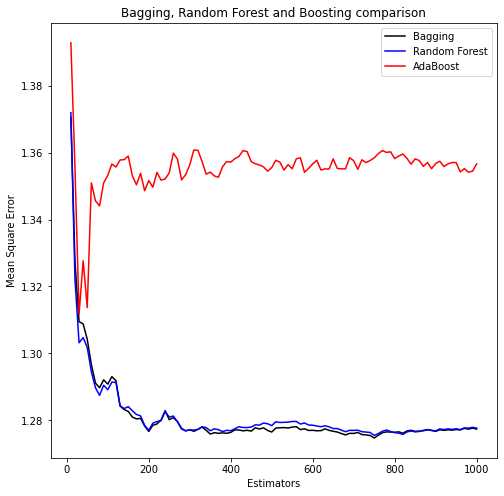

In [245]:
plt.figure(figsize = (8,8))
plt.title('Bagging, Random Forest and Boosting comparison' )
plt.plot(estimators,bagging_mse,'b-',color = "black", label = 'Bagging')
plt.plot(estimators,random_forest_mse,'b-',color = "blue", label = 'Random Forest')
plt.plot(estimators,boosting_mse,'b-',color = "red", label = 'AdaBoost')
plt.legend(loc = 'upper right')
plt.xlabel('Estimators')
plt.ylabel('Mean Square Error')
plt.show()